In [1]:
import numpy as np
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import seaborn as sb
import warnings

from scipy.stats import kurtosis, skew
warnings.filterwarnings('ignore')

In [2]:
features = joblib.load("/mnt/shared_drive/data/brain_therapy/BT_MVP_Content_Pilot/MVP_Working_Memory/pkls/features.pkl")
features.head()

ecg_heart_rate  ecg_hrv_std  \
Participant Type context Datetime                                               
0022        3D   T3      2019-08-22 13:21:30.124       79.787234    37.083413   
                         2019-08-22 13:21:35.388       85.365854          NaN   
                         2019-08-22 13:21:40.308       79.125848          NaN   
                         2019-08-22 13:21:45.616       77.922078          NaN   
                         2019-08-22 13:21:50.236       76.642336    21.468546   

                                                  skin_temperature   eda_mean  \
Participant Type context Datetime                                               
0022        3D   T3      2019-08-22 13:21:30.124         29.483117  25.693551   
                         2019-08-22 13:21:35.388               NaN        NaN   
                         2019-08-22 13:21:40.308         29.459804        NaN   
                         2019-08-22 13:21:45.616               NaN        NaN   
                         2019-08-22 13:21:50.236         29.459240        NaN   

                                                  eda_no_of_peaks    eda_lf  \
Participant Type context Datetime                                             
0022        3D   T3      2019-08-22 13:21:30.124              8.0  0.094892   
                         2019-08-22 13:21:35.388              NaN       NaN   
                         2019-08-22 13:21:40.308              NaN       NaN   
                         2019-08-22 13:21:45.616              NaN       NaN   
                         2019-08-22 13:21:50.236              NaN       NaN   

                                                    eda_hf  eda_lf_hf_ratio  \
Participant Type context Datetime                                             
0022        3D   T3      2019-08-22 13:21:30.124  0.029017         3.270236   
                         2019-08-22 13:21:35.388       NaN              NaN   
                         2019-08-22 13:21:40.308       NaN              NaN   
                         2019-08-22 13:21:45.616       NaN              NaN   
                         2019-08-22 13:21:50.236       NaN              NaN   

                                                  feature_time  event_order  \
Participant Type context Datetime                                             
0022        3D   T3      2019-08-22 13:21:30.124             0            1   
                         2019-08-22 13:21:35.388             1            1   
                         2019-08-22 13:21:40.308             2            1   
                         2019-08-22 13:21:45.616             3            1   
                         2019-08-22 13:21:50.236             4            1   

                                                  event_session_order  \
Participant Type context Datetime                                       
0022        3D   T3      2019-08-22 13:21:30.124                    1   
                         2019-08-22 13:21:35.388                    1   
                         2019-08-22 13:21:40.308                    1   
                         2019-08-22 13:21:45.616                    1   
                         2019-08-22 13:21:50.236                    1   

                                                  session_order  
Participant Type context Datetime                                
0022        3D   T3      2019-08-22 13:21:30.124              1  
                         2019-08-22 13:21:35.388              1  
                         2019-08-22 13:21:40.308              1  
                         2019-08-22 13:21:45.616              1  
                         2019-08-22 13:21:50.236              1

In [3]:
features_with_order = features.drop(["feature_time","event_session_order","session_order"], axis = 1)
features.drop(["feature_time","event_order","event_session_order","session_order"], axis = 1,inplace = True)

In [4]:
feature_names = features.columns.values[0:11]
feature_names

array(['ecg_heart_rate', 'ecg_hrv_std', 'skin_temperature', 'eda_mean',
       'eda_no_of_peaks', 'eda_lf', 'eda_hf', 'eda_lf_hf_ratio'],
      dtype=object)

In [5]:
participants = features.index.get_level_values("Participant").unique()
# p_type = features.index.get_level_values("context")

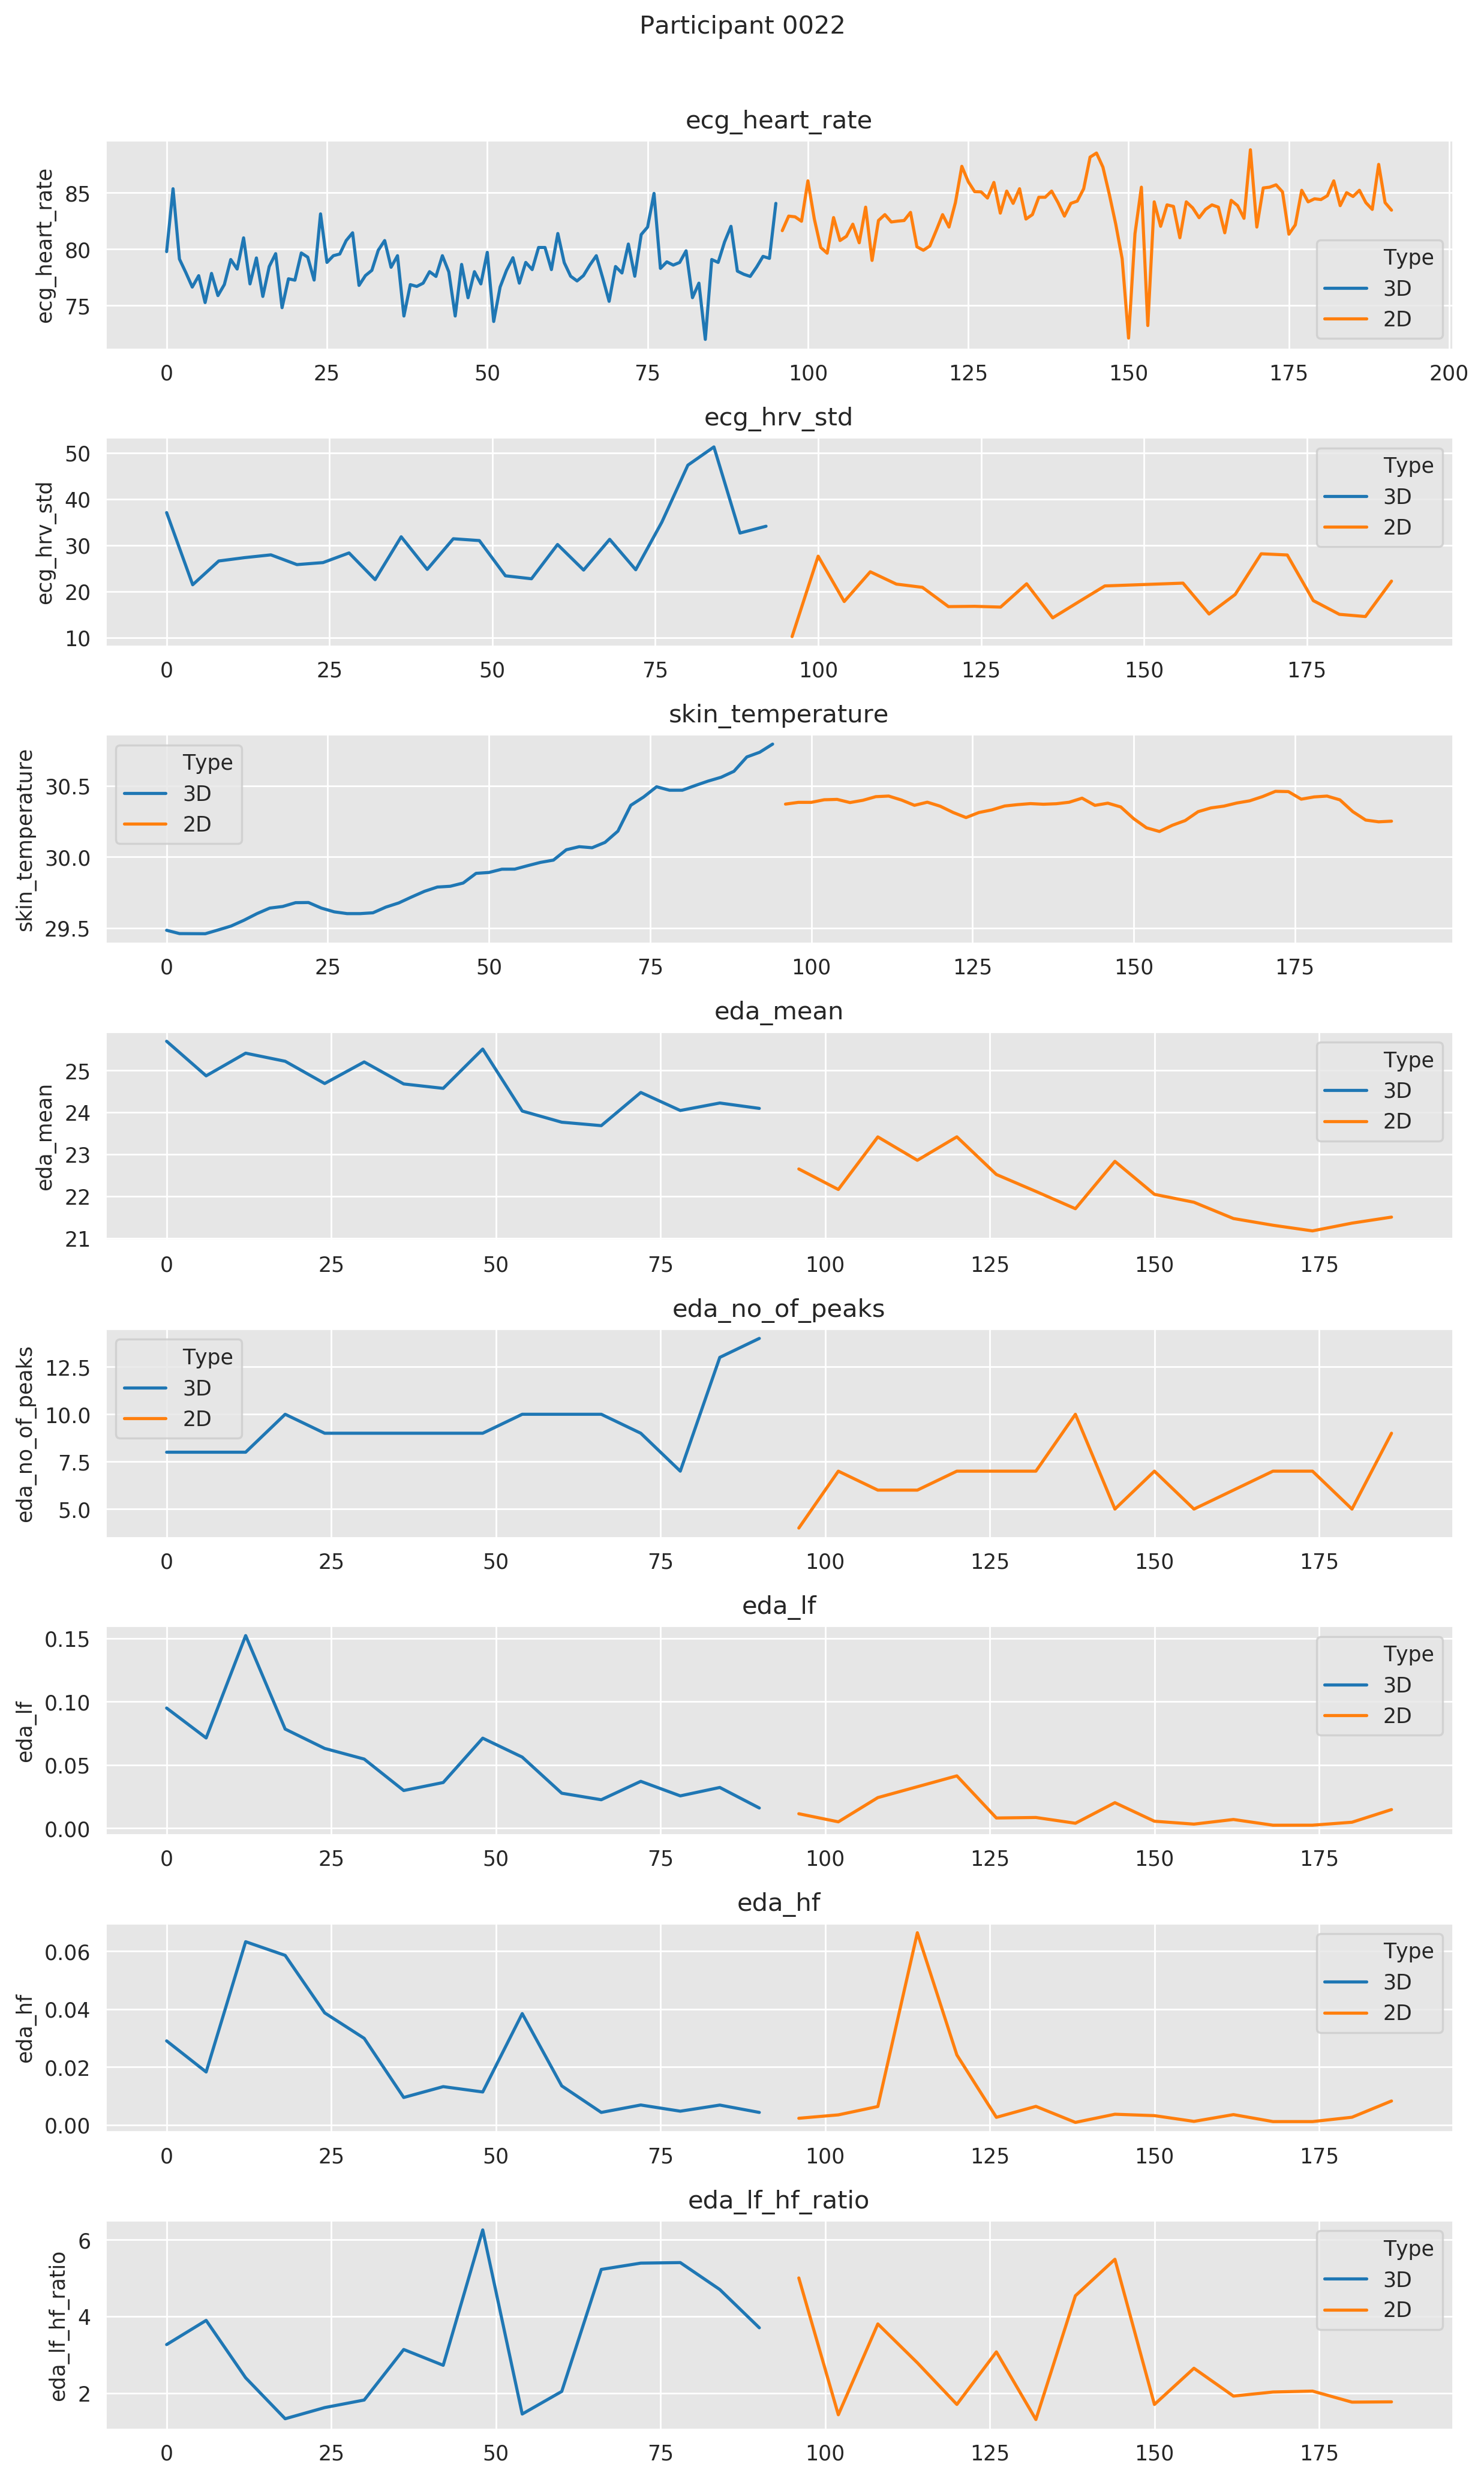

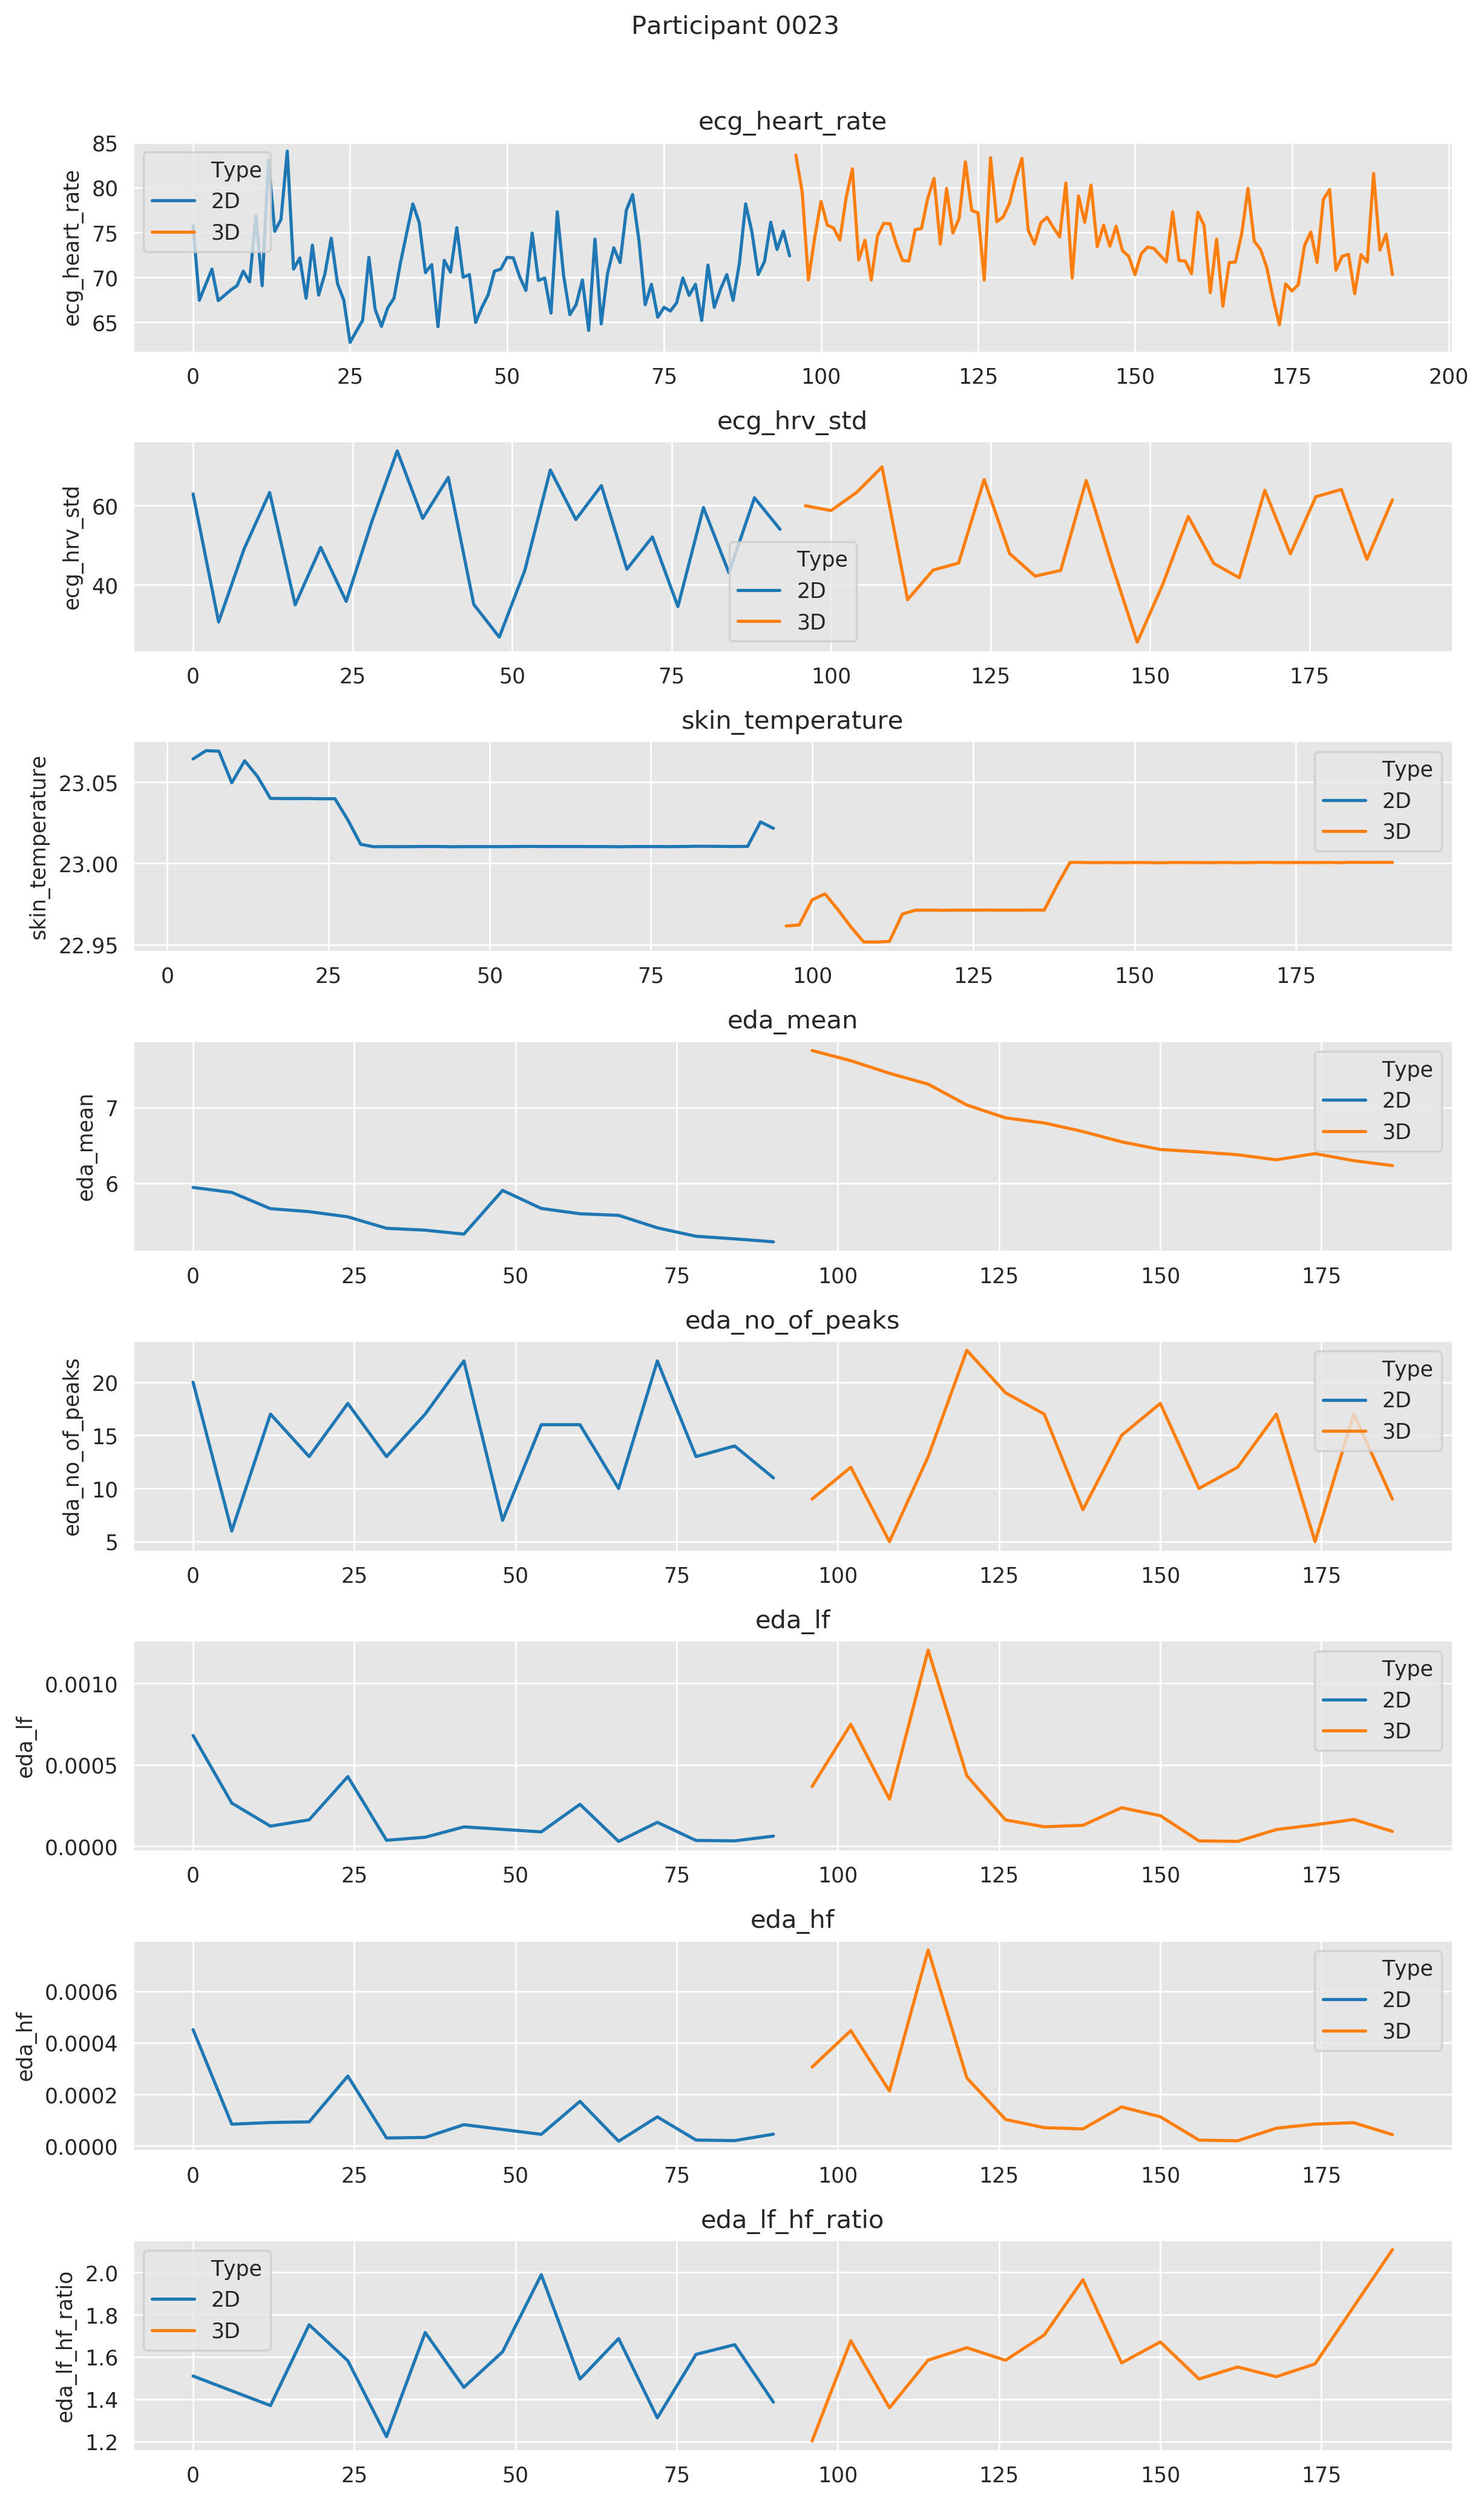

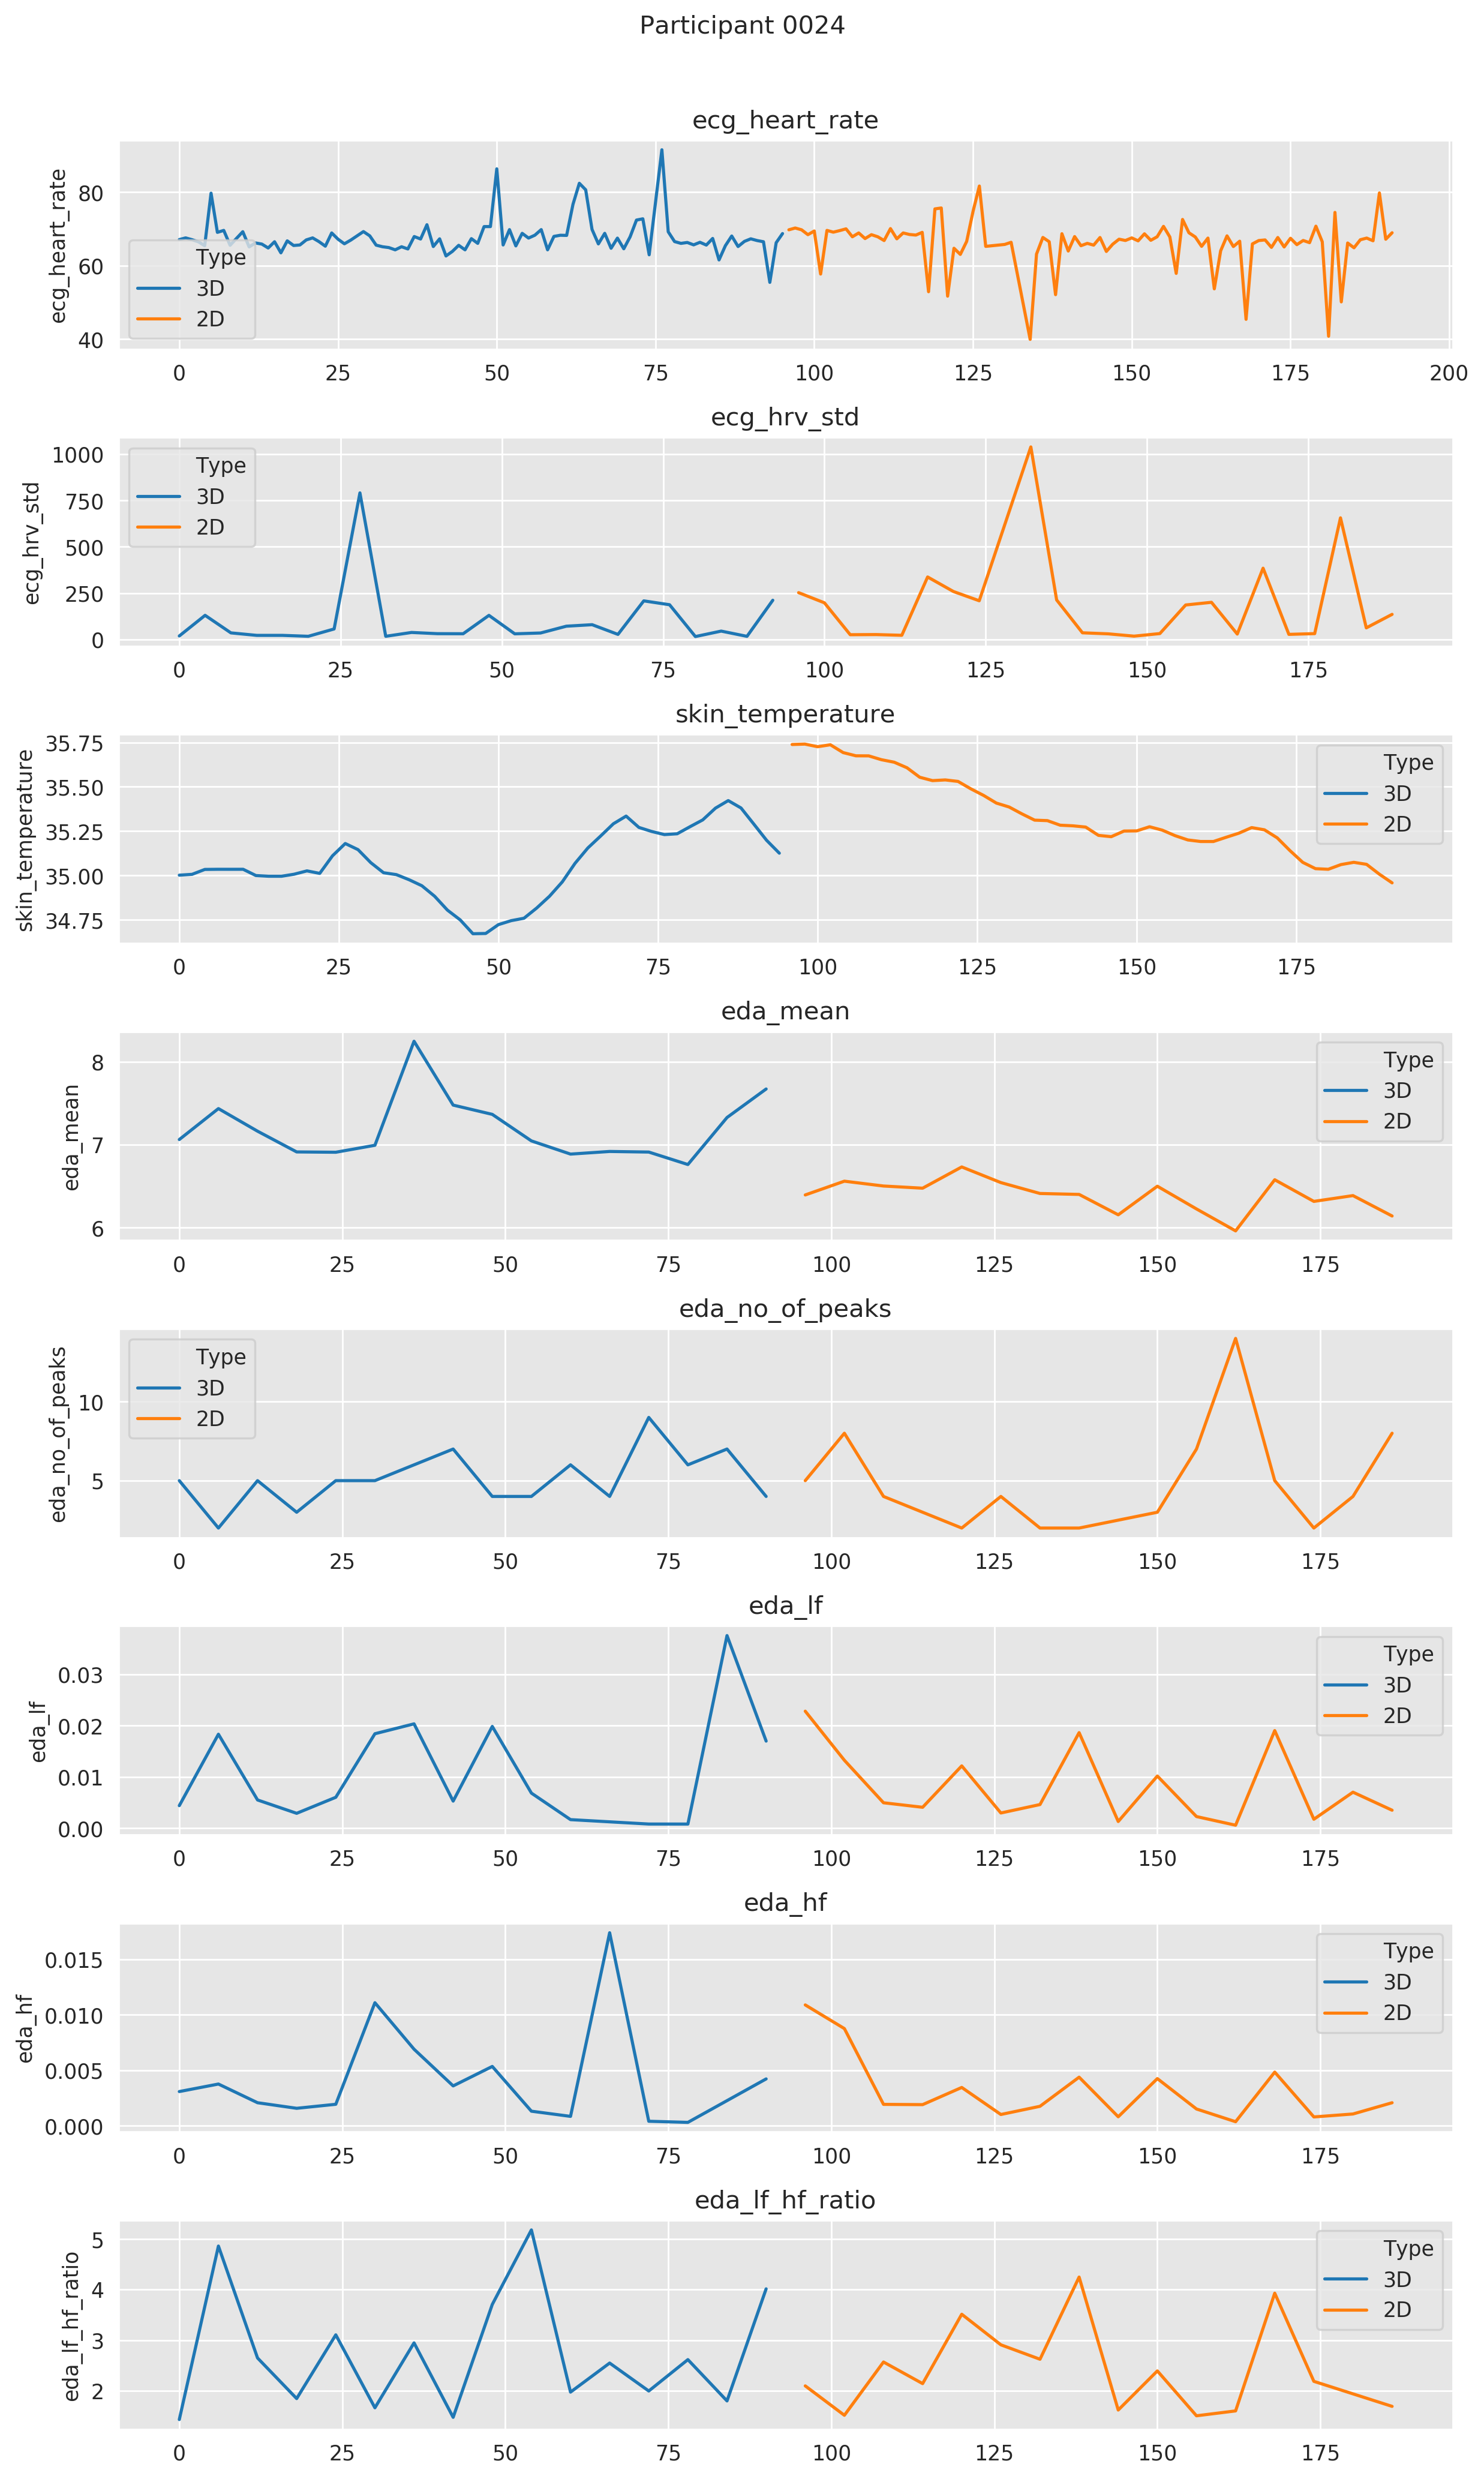

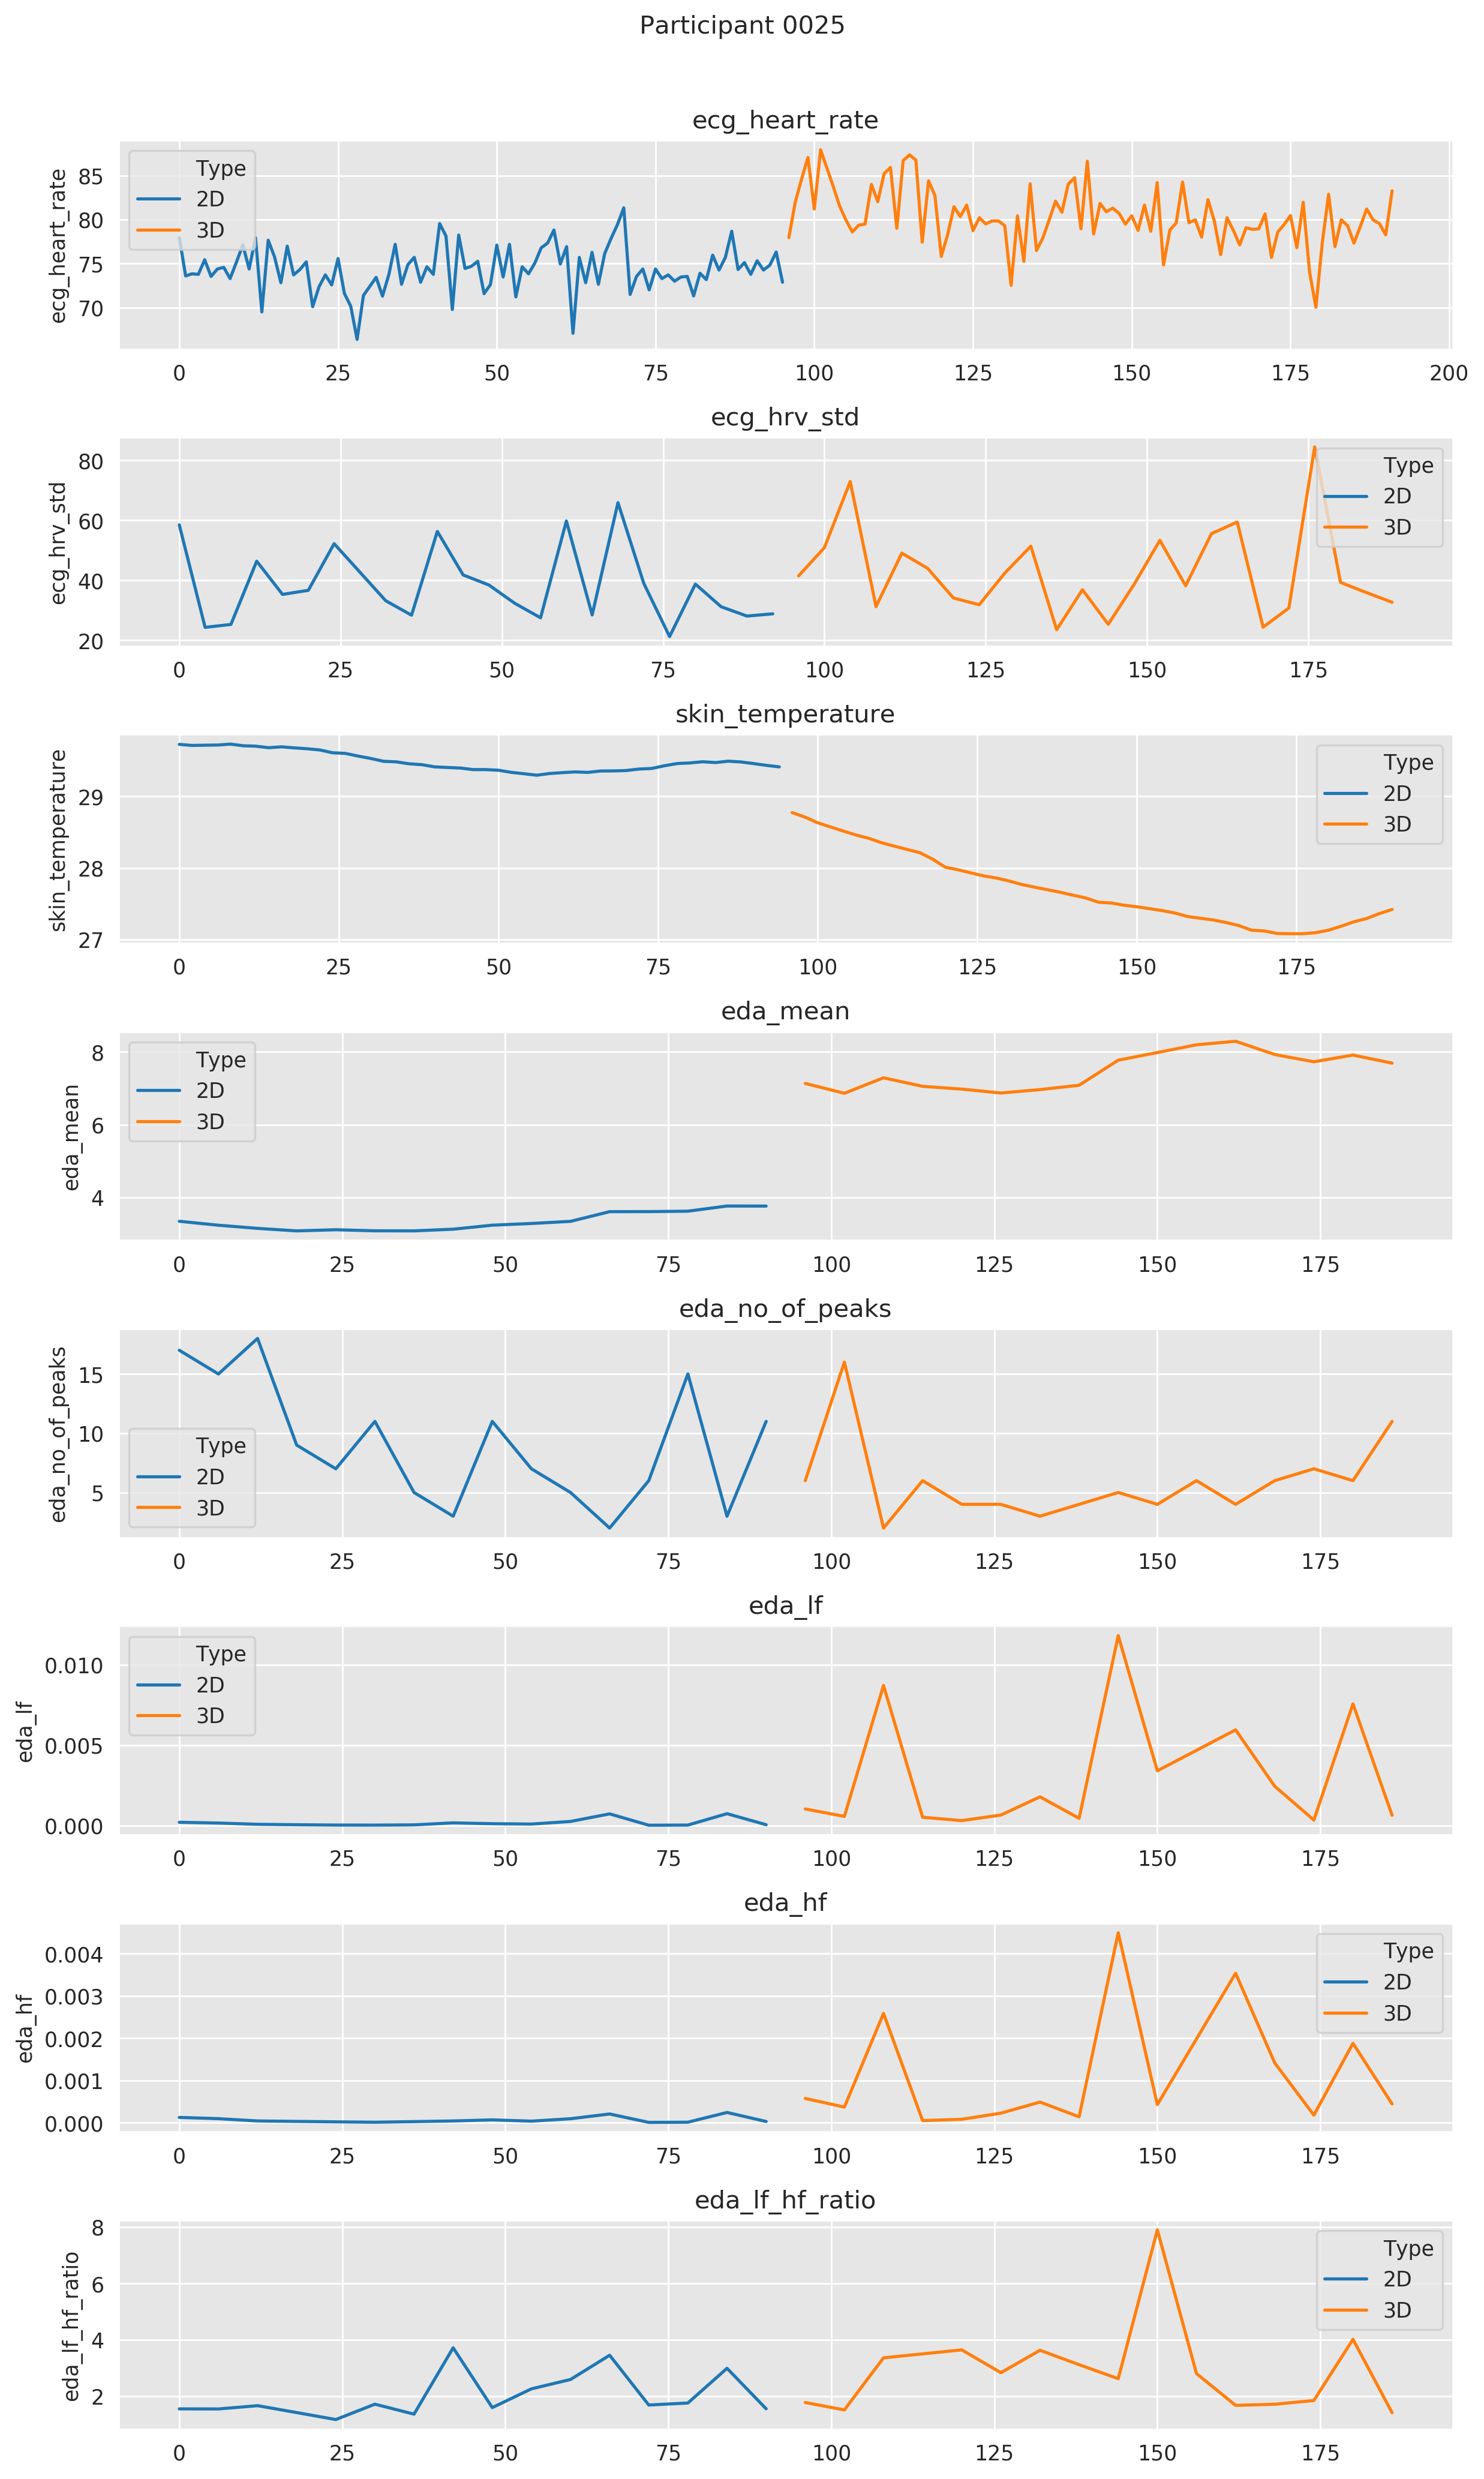

In [6]:
sb.set_style("darkgrid",{"axes.facecolor":".9"})
for participant in participants[0:4]:
    fig, axes = plt.subplots(8,1, figsize = (10,16), dpi = 250)
    data = features.loc(axis = 0)[participant,:,:,:]
    ax = axes.flatten()
    for i,feature_name in enumerate(feature_names):
        sb.lineplot(x = np.arange(0,len(data[feature_name])),y = feature_name, hue = "Type", data = data[[feature_name]].reset_index(), ax = ax[i])
        ax[i].set_title(feature_name)
    suptitle = plt.suptitle("Participant {}".format(participant), y = 1.03)
    plt.tight_layout()
    plt.plot()
#     break
#     fig.savefig("/mnt/bkt_prd_dsv_brain_therapy_raw/MVP_FA_Visualizations/features_each_participant/{}.png".format(participant), 
#                dpi = fig.dpi, bbox_inches = 'tight', bbox_extra_artists = [suptitle])
